Announcements
1. Problem set 8 and Quiz 8 due at the end of the week
2. Discussion Board Post 3 grades will be updated within the next couple of days
3. Be mindful of Problem Set 7 comments
  - We may send out specific feedback to people


Binary classification

1. Classifying with a moving criterion
2. Calculating confusion matrix/accuracy /f1 score
3. Generating ROC and precision recall curves - and getting (AUC) area under the curve
4. Quiz 6 and 7 review

Let's load our libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Today's, let's classify penguins!

In [2]:
data = sns.load_dataset('penguins')

Let's check out the data

In [3]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


hmm. looks like we have some NaNs

<AxesSubplot:>

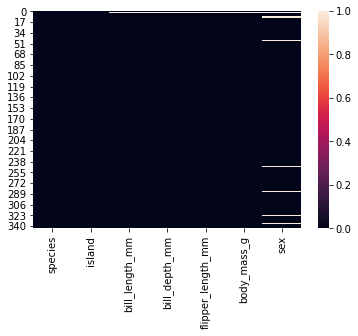

In [4]:
sns.heatmap(data.isnull())

There aren't too many, so let's just drop them

In [5]:
data.dropna(inplace=True)

And let's dummy code the sex column, since we will just focus on binary classification for now

In [6]:
data.insert(len(data.columns),'sex01',pd.get_dummies(data['sex'],drop_first=True))

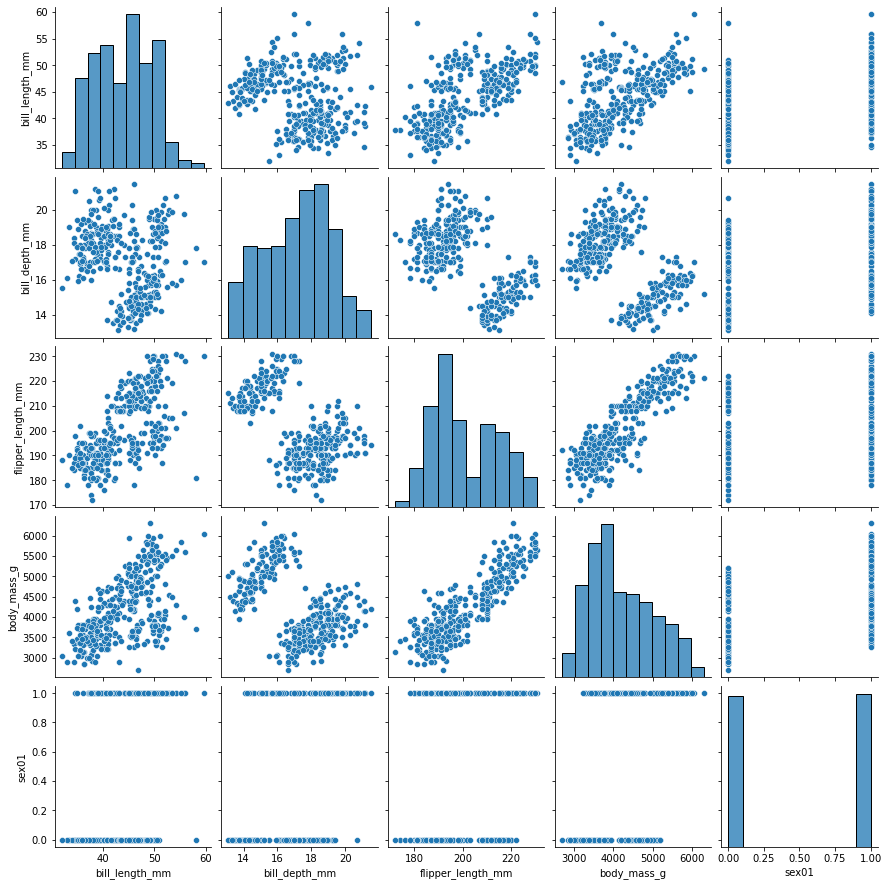

In [7]:
sns.pairplot(data)


We will store our predictor as X, which basically turns it into an array/series

In [8]:
X = data['body_mass_g']

Now, let's get our target array

In [9]:
y = data['sex01']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Here is what these data look like plotted against each other

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex01', ylabel='body_mass_g'>

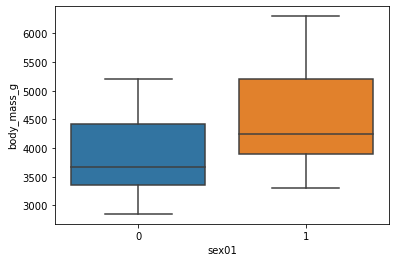

In [11]:
sns.boxplot(y_train,X_train)

So, here we go. Looks good

So, let's just try arbitarily setting a criterion to see how well this works for our data. 

We are coming up with this prediction based on our training data and we want to see its accuracy in our testing data

So, any guesses?


Now, let's say, if X is greater than 4500, prediction should return a true (1). If not, then a false (0).

In [12]:
prediction = X_test >= 4500

setting the criterion to be 4500

predicting = anything above this = group 1

anything below this = group 0

So, we can basically calculate our confusion matrix by comparing the prediction to the actual values y

In [13]:
TP = sum((y_test==1) & (prediction==1)) # actual is true, prediction is true
FP = sum((y_test==0) & (prediction==1)) # actual is false, prediction is true
TN = sum((y_test==0) & (prediction==0)) # actual is false, prediction is false
FN = sum((y_test==1) & (prediction==0)) # actual is true, prediction is false

In [14]:
print(TP,TN,FP,FN)

22 31 14 17


And now, we can calculate accuracy. awesome!

In [15]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(accuracy)

0.6309523809523809


Cool. But maybe 4500 isn't the best predictor. Let's try to find a better estimate

So, let's make a for loop that goes through all possible criterions. We could do linspace(0,9999999) but that seems like overkill.

How about we just make every possible unique value of X a criterion? That way, we aren't wasting time with criterions between values since that won't actually change our confusion matrix

And, lets sort these criterions so we can see the effect of increasing the criterion on our accuracy

In [16]:
criterions = np.unique(np.sort(X_train))

In [17]:
criterions

array([2850., 2900., 2925., 3000., 3050., 3075., 3150., 3175., 3200.,
       3250., 3300., 3325., 3350., 3400., 3425., 3450., 3500., 3525.,
       3550., 3600., 3625., 3650., 3675., 3700., 3725., 3750., 3775.,
       3800., 3825., 3850., 3900., 3950., 3975., 4000., 4050., 4075.,
       4100., 4150., 4200., 4250., 4275., 4300., 4350., 4375., 4400.,
       4450., 4475., 4500., 4575., 4600., 4625., 4650., 4675., 4700.,
       4725., 4750., 4775., 4800., 4850., 4875., 4900., 4925., 4975.,
       5000., 5050., 5100., 5200., 5250., 5300., 5350., 5400., 5500.,
       5550., 5600., 5700., 5750., 5800., 5850., 6000., 6050., 6300.])

Here is our for loop. This for loop should look really similar to what we did above with the prediction and TP, FP, TN, and FN

We will also save some calculations of the confusion matrix 

One big difference -> here, we want to find the best TRAINING predictor. 


In [18]:
ACC = []
F1 = []

all_TP = []
all_TN = []
all_FP = []
all_FN = []

for i in range(0,len(criterions)):

  prediction = X_train >= criterions[i]

  TP = sum((y_train==1) & (prediction == 1)) # true positives
  TN = sum((y_train==0) & (prediction == 0))
  FP = sum((y_train==0) & (prediction == 1)) # predicted group 1, but its actually group 0
  FN = sum((y_train==1) & (prediction == 0)) 

  ACC.append((TP+TN)/(TP+TN+FP+FN))
  F1.append((2*TP)/(2*TP+FN+FP))

  all_TP.append(TP)
  all_TN.append(TN)
  all_FP.append(FP)
  all_FN.append(FN)

Very cool. Let's now plot and see how accuracy changes as a function of the criterion

We can similarly plot F1-score as well

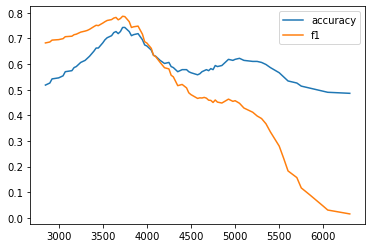

In [19]:
plt.plot(criterions,ACC,label='accuracy')
plt.plot(criterions,F1,label='f1')
plt.legend()

Let's think about what is happening first:

Accuracy cares more about true positives and true negatives (basically, just getting things right = good)

F1 score cares more about minimizing false negatives and false positives, hence 

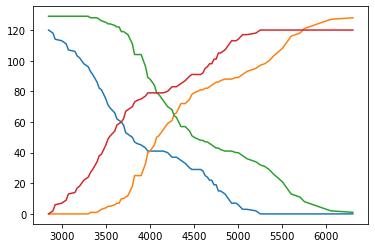

In [20]:
# just another plot showing how FP, FN, TP, and TN change as a function of the criterion
plt.plot(criterions,all_FP)
plt.plot(criterions,all_FN)
plt.plot(criterions,all_TP)
plt.plot(criterions,all_TN)

Overall, this matches what we would expect
  - as you move the criterion, accuracy and F1 score increase. Then, as you move passed the optimum parameter, accuracy and F1 score decrease.
  - The maximum accuracy and F1 score are different because they measure slightly different things


In this case, there are two bumps though, which is a bit strange

  What could this mean?
  
  Let's just check the data again to be sure

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

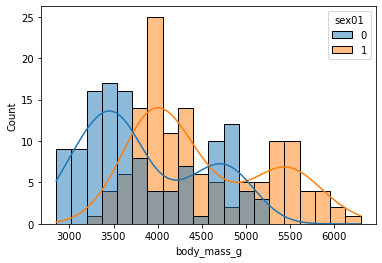

In [21]:
sns.histplot(x=X_train,hue=y_train,bins=20,kde=True)


We can see which criterions maximized Accuracy and F1 score below

In [22]:
[ACC == np.max(ACC)]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False])]

In [23]:
criterions[ACC == np.max(ACC)]

array([3725., 3750.])

In [24]:
criterions[F1 == np.max(F1)]

array([3725.])

So, in both cases, 3725 is the best estimate in our training set.

To evaluate this threshold, we try it out with our testing set. 

In [25]:
prediction = X_test >= 3725

TP = sum((y_test==1) & (prediction==1)) # actual is true, prediction is true
FP = sum((y_test==0) & (prediction==1)) # actual is false, prediction is true
TN = sum((y_test==0) & (prediction==0)) # actual is false, prediction is false
FN = sum((y_test==1) & (prediction==0)) # actual is true, prediction is false

accuracy = (TP+TN)/(TP+TN+FP+FN)
print(accuracy)

0.6666666666666666


Cool! A different metric that is super useful is looking at the relationship between true and false positive rates


In [26]:
TPR = []
FPR = []

ACC = []
F1 = []

for i in range(0,len(criterions)):

  prediction = X_train >= criterions[i]

  TP = sum((y_train==1) & (prediction == 1)) # true positives
  TN = sum((y_train==0) & (prediction == 0))
  FP = sum((y_train==0) & (prediction == 1)) # predicted group 1, but its actually group 0
  FN = sum((y_train==1) & (prediction == 0)) 

  ACC.append((TP+TN)/(TP+TN+FP+FN))
  F1.append((2*TP)/(2*TP+FN+FP))

  TPR.append((TP)/(TP+FN))
  FPR.append((FP)/(FP+TN)) 


We can see how true and false positive rates change as a function of the criterion

When plotting like this, what we really want to see is high true positive rates and low false positive rates, so basically the criterion with the largest difference between these two is typically the best

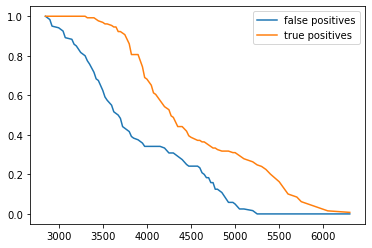

In [27]:
plt.plot(criterions,FPR,label='false positives')
plt.plot(criterions,TPR,label='true positives')
plt.legend()

Another way to plot true and false positive rates is against each other

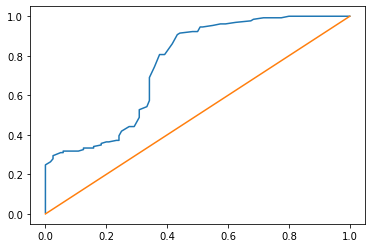

In [28]:
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1])

This is a receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 

[explanation of ROC](https://upload.wikimedia.org/wikipedia/commons/3/36/Roc-draft-xkcd-style.svg)

ROC curves are used in a variety of contexts. Here, when we are interested in detecting the difference between signal and noise, ROC curves visualizes the full range of outcomes as you change the criterion

https://isle.hanover.edu/Ch02Methods/Ch02SDT_ROC.html

However, just like with linear regression inference, when it comes to prediction, things are a bit different

Instead, we look at the ROC curve between predictions and the probability of those predictions. We can't quite do this with our simple for loop above, but we can show it with functions from sklearn. 

We will go into more detail about what is happening on Wednesday

In [29]:
from sklearn import tree # importing our decision tree model
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression

Just like with linear regression, we first create the model object and then train that model with our training data

In [30]:
tree_model = tree.DecisionTreeClassifier(max_depth=1)
tree_model.fit(X_train[:,np.newaxis], y_train)

<ipython-input-30-bb5402b4c645>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tree_model.fit(X_train[:,np.newaxis], y_train)


DecisionTreeClassifier(max_depth=1)

We can check the accuracy of this model using tree_model.score, which is just like what we did with the linear regression model!

In [31]:
tree_model.score(X_test[:,np.newaxis], y_test)

<ipython-input-31-aa9c2c1ea6e6>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tree_model.score(X_test[:,np.newaxis], y_test)


0.6666666666666666

And look, its the same as what we found. Cool!

To look at the ROC curve for our prediction, we first need to probability that something belongs to a group. We can show that with the following method

Now, we just want the predictions for the positive class (the class in the right column)

In [32]:
y_predicted = tree_model.predict_proba(X_test[:,np.newaxis])[:,1]

<ipython-input-32-c27ace561062>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_predicted = tree_model.predict_proba(X_test[:,np.newaxis])[:,1]


Out of curiosity, you can see how the probability relates to the actual X_test values, which is pretty cool

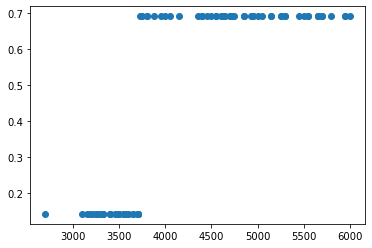

In [33]:
plt.scatter(X_test,y_predicted)

And now, we can use the roc_curve function

This function wants the actual y values and the predicted y values

In [34]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predicted)

Cool! and now, we can make our ROC plot

Text(0, 0.5, 'true positive rate')

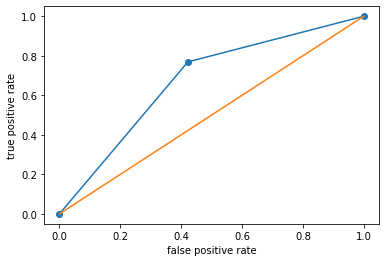

In [35]:
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

Well.... this isn't super interesting. 

Why is there just a single point?

If you think back to our probabilities from this decision tree, we only have a single split between our groups, just like in our for loop version. This means there is just a criterion and thus a single point in our ROC curve.

Regardless, we can quantify the ROC curve by calculating the area under the curve (AUC)

In [36]:
metrics.roc_auc_score(y_test,y_predicted)

0.6735042735042734

All this stuff above is for practice and to get you familiar with concepts like a confusion matrix, precision, recall, and ROC curves

Next class, we will compare different classification approaches decision trees, logistic regression, and support vector

This exchange has some more insight into ROC curves

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=a%20ROC%20curve.-,What%20Are%20ROC%20Curves%3F,values%20between%200.0%20and%201.0.

https://stats.stackexchange.com/questions/105501/understanding-roc-curve
